# Filament Homing Analysis

In [29]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from pyfilaments._def_analysis import *
import pandas as pd
import h5py

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')
# Create a folder for storing Publication figures
publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure5'

if not os.path.exists(publication_figures):
    os.makedirs(publication_figures)

import _figure_parameters

In [30]:
# Load the homing simulation data
homing_data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ProgrammingFilamentBehavior/Homing/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.718_activityTime_750_simType_point/HomingBehavior_activityStrength'

folders = os.listdir(homing_data_folder) # Each folder corresponds to a different starting filament shape

init_shape_array = []
final_shape_array = []
base_tip_angle_array = []
for ii, folder in enumerate(folders):
    
    files = os.listdir(os.path.join(homing_data_folder, folder))
    
    for file in files:
        if(file.endswith('.hdf5') and 'ic' not in file):
                       
            fil = analysis.analysisTools(file = os.path.join(homing_data_folder, folder, file))
                       
            init_shape = fil.R[0,:]
            final_shape = fil.R[-1,:]
                       
            init_shape_array.append(init_shape)
            final_shape_array.append(final_shape)
            
            # Also store the time-series of filament angles for each simulation
                       
            fil.compute_base_tip_angle()
            
            base_tip_angle_array.append(fil.derived_data['base tip angle'])
            
            
            if ii==0:
                Np = fil.Np
                common_cycle_array = fil.Time/fil.activity_timescale




<IPython.core.display.Javascript object>


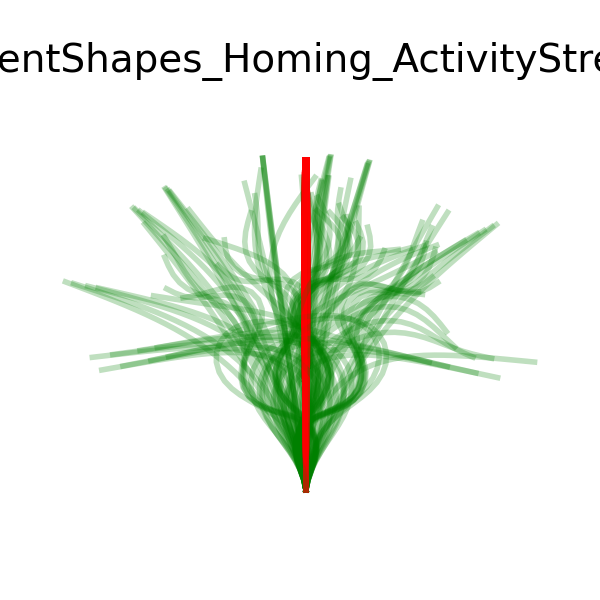

In [32]:
## Plot an overlay of all the initial and final shapes
save = True
plt.figure(figsize=(3,3))
title = 'FilamentShapes_Homing_ActivityStrength'
for ii in range(len(init_shape_array)):
    
    init_shape = init_shape_array[ii]
    final_shape = final_shape_array[ii]
    
    first_index = 0
    second_index = Np
    
    x_pos = init_shape[first_index:first_index+Np]
    y_pos = init_shape[second_index:second_index+Np]
    
    
    plt.plot(y_pos, x_pos, color = 'g', alpha = 0.25, zorder = 0, linewidth = 2)
    
    x_pos = final_shape[first_index:first_index+Np]
    y_pos = final_shape[second_index:second_index+Np]
    
    
    plt.plot(y_pos, x_pos, color = 'r', alpha = 0.35, zorder = 0, linewidth = 2)

plt.title(title)

plt.axis('equal')
plt.axis('off')
plt.tight_layout()

if save:
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
    
plt.show()
plt.show()
    

<IPython.core.display.Javascript object>


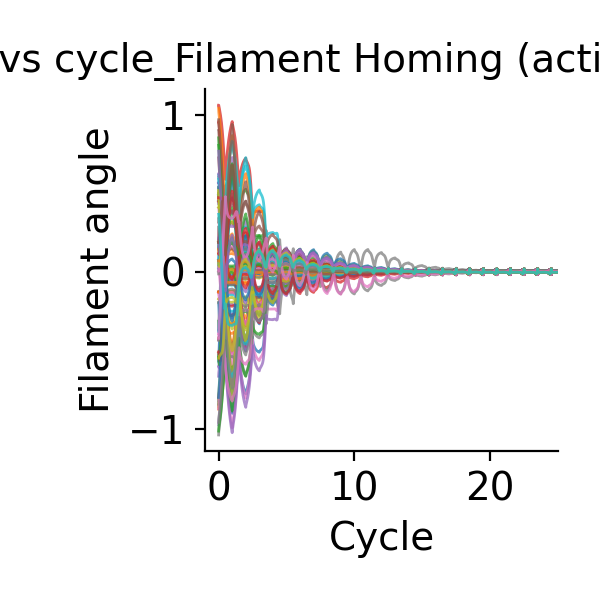

In [35]:
# Plot the relaxation of base tip angles
save = True
plt.figure(figsize=(3,3))
title = 'Base tip angle vs cycle_Filament Homing (activity strength encoding)'

for ii in range(len(base_tip_angle_array)):
    
    base_tip_angle = base_tip_angle_array[ii]
    
    
    plt.plot(common_cycle_array, base_tip_angle, alpha = 0.75, zorder = 0, linewidth = 1)
    
plt.title(title)
plt.ylabel('Filament angle')
plt.xlabel('Cycle')
plt.tight_layout()
sns.despine(right=True, top=True)
plt.xlim([-1, 25])
if save:
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
plt.show()


<IPython.core.display.Javascript object>


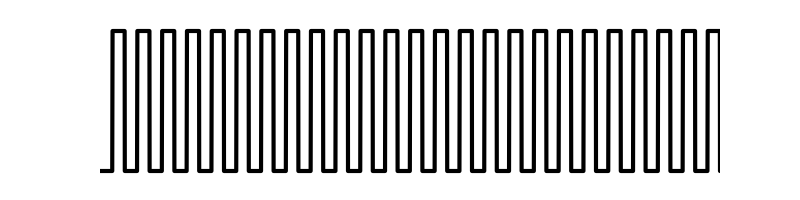

In [41]:
# Plot the activity profile
save = True
plt.figure(figsize=(4,1))
title = 'ActivityProfile'
plt.plot(common_cycle_array, fil.D0*fil.activity_profile, 'k-')
if save:
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
plt.xlim([0, 25])
plt.axis('off')
plt.show()